In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings("ignore")
#%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\mayank\Desktop\mayank\oasis infobytes\Sales PRediction\Advertising.csv", index_col = 0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.shape

(200, 4)

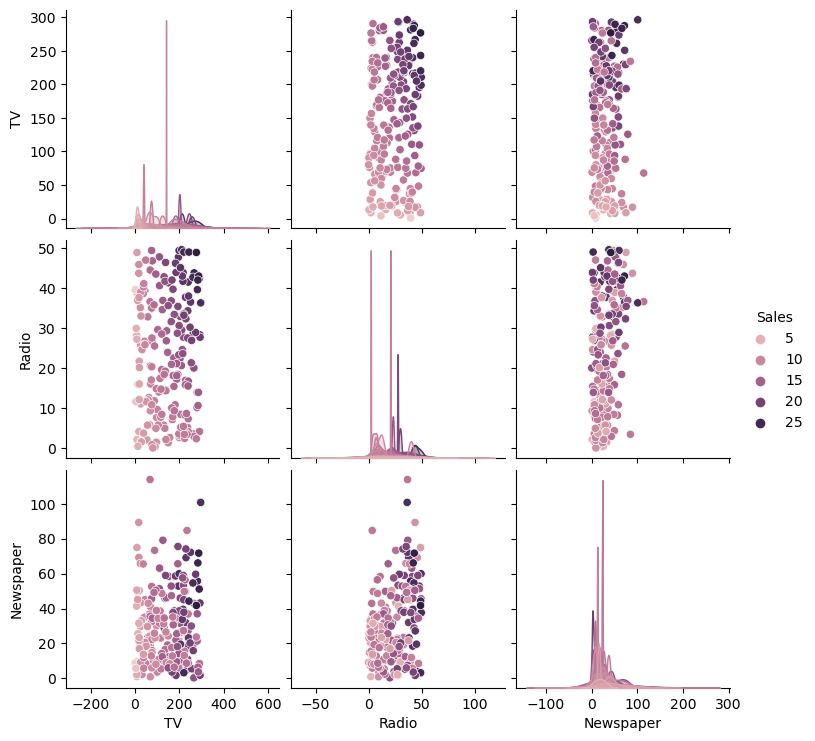

In [7]:
sns.pairplot(df,hue='Sales')

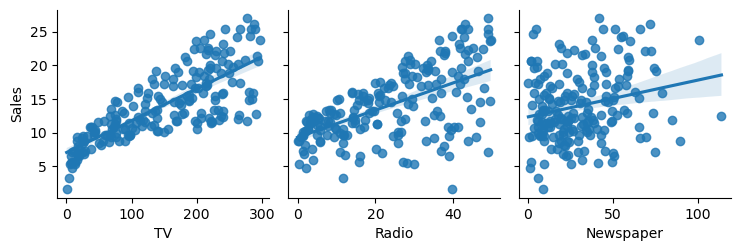

In [8]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

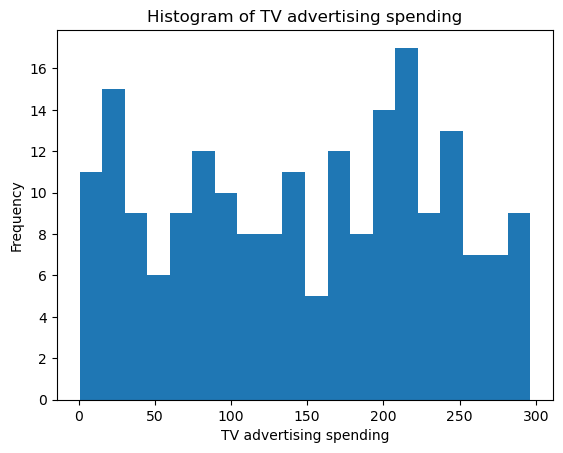

In [9]:
plt.hist(df['TV'],bins=20)
plt.xlabel('TV advertising spending')
plt.ylabel('Frequency')
plt.title('Histogram of TV advertising spending')
plt.show()

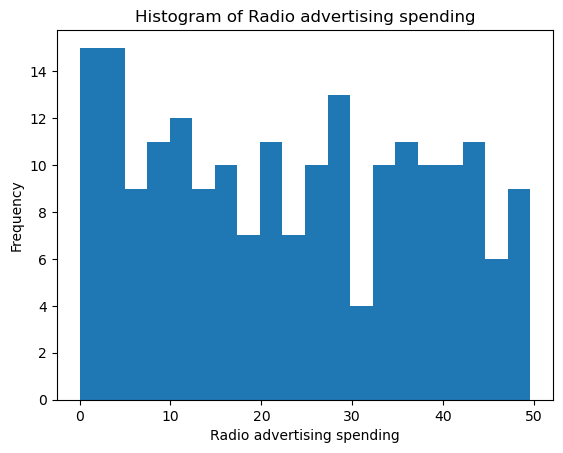

In [10]:
plt.hist(df['Radio'],bins=20)
plt.xlabel('Radio advertising spending')
plt.ylabel('Frequency')
plt.title('Histogram of Radio advertising spending')
plt.show()

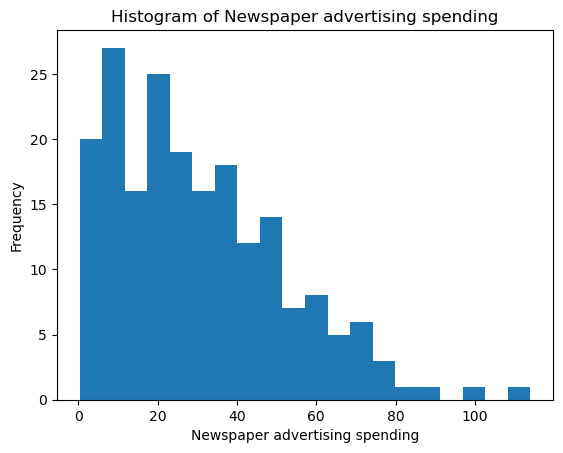

In [11]:
plt.hist(df['Newspaper'],bins=20)
plt.xlabel('Newspaper advertising spending')
plt.ylabel('Frequency')
plt.title('Histogram of Newspaper advertising spending')
plt.show()

<Axes: >

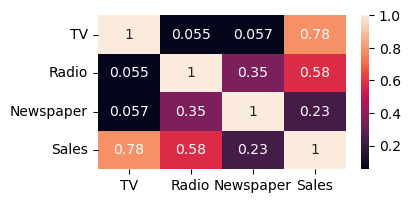

In [12]:
plt.figure(figsize=(4,2))
cor=df.corr()
sns.heatmap(cor,annot=True)

In [13]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [14]:
from sklearn.model_selection import train_test_split
x=df.drop('Sales',axis=1)
y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [15]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lm.predict(x_test)

In [16]:
# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.7332927815807735
R-squared: 0.9184369032278497


In [18]:
import statsmodels.formula.api as sm

In [19]:
lm = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=df).fit()

In [20]:
# Print the coefficients of the linear model
print(lm.params, "\n")


Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64 



In [21]:
# Print the summary of the linear regression model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           1.58e-96
Time:                        02:26:13   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0